<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span></li><li><span><a href="#Обучение-и-проверка-модели" data-toc-modified-id="Обучение-и-проверка-модели-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение и проверка модели</a></span><ul class="toc-item"><li><span><a href="#Разбивка-и-масштабирование-данных" data-toc-modified-id="Разбивка-и-масштабирование-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Разбивка и масштабирование данных</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обучение моделей</a></span></li></ul></li><li><span><a href="#Подготовка-к-расчёту-прибыли" data-toc-modified-id="Подготовка-к-расчёту-прибыли-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка к расчёту прибыли</a></span></li><li><span><a href="#Расчёт-прибыли-и-рисков" data-toc-modified-id="Расчёт-прибыли-и-рисков-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Расчёт прибыли и рисков</a></span><ul class="toc-item"><li><span><a href="#Нулевой-регион" data-toc-modified-id="Нулевой-регион-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Нулевой регион</a></span></li><li><span><a href="#Первый-регион" data-toc-modified-id="Первый-регион-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Первый регион</a></span></li><li><span><a href="#Второй-регион" data-toc-modified-id="Второй-регион-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Второй регион</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Выбор локации для скважины

Компании, занимающейся добычей полезных ископаемых, нужно решить, где бурить новую скважину.

Для работы нам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. 

Задача: построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализировать возможную прибыль и риски.

Шаги для выбора локации:

- В избранном регионе ищем месторождения, для каждого определяем значения признаков;
- Строим модель и оцениваем объём запасов;
- Выбираем месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

# Описание данных

- id — уникальный идентификатор скважины;
- f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
- product — объём запасов в скважине (тыс. баррелей).

## Загрузка и подготовка данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from scipy import stats as st
from pylab import rcParams

import warnings
warnings.filterwarnings('ignore')

In [2]:
RANDOM_STATE = 12345
RANDOM_RANDOM_STATE = np.random.RandomState(RANDOM_STATE)

In [3]:
data_0 = pd.read_csv('C:\\Users\\mikha\\Desktop\\Data scince\\Projects\\Data\\Данные МО  в бизнесе\\geo_data_0.csv')
data_1 = pd.read_csv('C:\\Users\\mikha\\Desktop\\Data scince\\Projects\\Data\\Данные МО  в бизнесе\\geo_data_1.csv')
data_2 = pd.read_csv('C:\\Users\\mikha\\Desktop\\Data scince\\Projects\\Data\\Данные МО  в бизнесе\\geo_data_2.csv')

Посмотрим на данные.

In [4]:
[display(df.head()) for df in [data_0,data_1,data_2]]

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


[None, None, None]

Выведим общую информацию о датасетах.

In [5]:
[df.info() for df in [data_0,data_1,data_2]]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null 

[None, None, None]

Проверим наличие дубликатов в названии.

In [6]:
[df['id'].duplicated().sum() for df in [data_0,data_1,data_2]]

[10, 4, 4]

По некоторым скважинам информация дублируется, возможно, произошел какой-то баг при записи данных в базу, а возможно и нет. В любом случае, данный момент нужно уточнять у заказчика.

Проверим есть ли полные дубликаты.

In [7]:
[df.duplicated().sum() for df in [data_0,data_1,data_2]]

[0, 0, 0]

Дубликатов в ID очень мало, полные и вовсе отстутствуют. Отметим, что при приведении всех ID к нижнему регистру, полные дубликаты так-же не попадаются, но кол-во дубликатов по столбцу ID увеличивается, однако их кол-во все равно крайне мало. Можно проигнорировать их наличие.

Столбец с ID в дальнейшей работе нам не пригодится. Удалим его.

In [8]:
data_0 = data_0.drop(['id'], axis=1)
data_1 = data_1.drop(['id'], axis=1)
data_2 = data_2.drop(['id'], axis=1)

data_0.head()

,f0,f1,f2,product
0,0.705745,-0.497823,1.221170,105.280062
1,1.334711,-0.340164,4.365080,73.037750
2,1.022732,0.151990,1.419926,85.265647
3,-0.032172,0.139033,2.978566,168.620776
4,1.988431,0.155413,4.751769,154.036647


Изучим данные.

[array([[<AxesSubplot:title={'center':'f0'}>,
         <AxesSubplot:title={'center':'f1'}>],
        [<AxesSubplot:title={'center':'f2'}>,
         <AxesSubplot:title={'center':'product'}>]], dtype=object),
 array([[<AxesSubplot:title={'center':'f0'}>,
         <AxesSubplot:title={'center':'f1'}>],
        [<AxesSubplot:title={'center':'f2'}>,
         <AxesSubplot:title={'center':'product'}>]], dtype=object),
 array([[<AxesSubplot:title={'center':'f0'}>,
         <AxesSubplot:title={'center':'f1'}>],
        [<AxesSubplot:title={'center':'f2'}>,
         <AxesSubplot:title={'center':'product'}>]], dtype=object)]

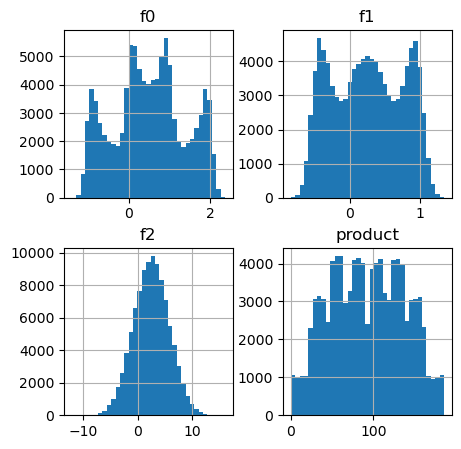

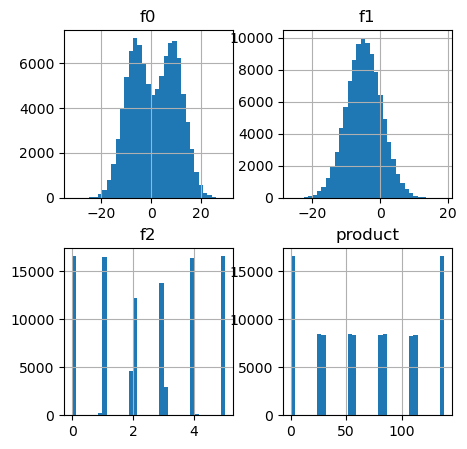

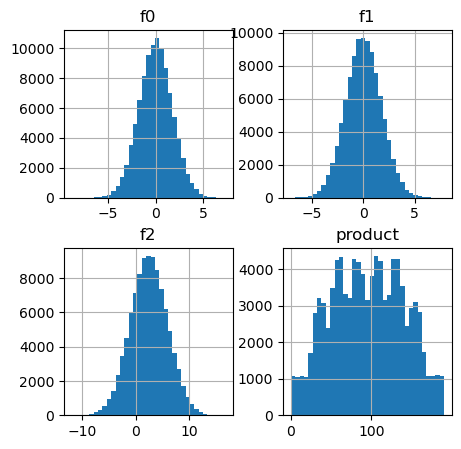

In [9]:
[df.hist(figsize=(5, 5), bins=35) for df in [data_0,data_1,data_2]]

Данные признаков сильно разнятся, видимо для каждого датасета выбраны разные параметры. А в `data_1` и вовсе значения некоторых столбцов распределены интервально.

Судя по гистрограммам, можно сдлеать вывод, что не все значения распределены нормально, однако без "выбросов".

Для дальнешей работы масштабируем данные. Обучать модели масштабирования, в связи с описанным выше, придется для каждого датасета отдельно.

## Обучение и проверка модели

### Разбивка и масштабирование данных

Разобьем данные на обучающую и валидационную выборки в соотношении 75:25 и масштабируем.

In [10]:
target_0 = data_0['product']
features_0 = data_0.drop('product', axis=1)

target_1 = data_1['product']
features_1 = data_1.drop('product', axis=1)

target_2 = data_2['product']
features_2 = data_2.drop('product', axis=1)


features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(
 features_0, target_0, test_size=0.25, random_state=RANDOM_STATE)

features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(
 features_1, target_1, test_size=0.25, random_state=RANDOM_STATE)

features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(
 features_2, target_2, test_size=0.25, random_state=RANDOM_STATE)

print (features_train_2.info())
print (len(target_train_2))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75000 entries, 27212 to 86498
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f0      75000 non-null  float64
 1   f1      75000 non-null  float64
 2   f2      75000 non-null  float64
dtypes: float64(3)
memory usage: 2.3 MB
None
75000


In [11]:
numeric = ['f0', 'f1', 'f2']

features_train_list = [features_train_0, features_train_1, features_train_2]
features_valid_list = [features_valid_0, features_valid_1, features_valid_2]

In [12]:
scaler = StandardScaler()

for train, valid in zip(features_train_list, features_valid_list):
    scaler.fit(train[numeric])
    train[numeric] = scaler.transform(train[numeric])
    valid[numeric] = scaler.transform(valid[numeric])
    display (valid.head())

,f0,f1,f2
71751,0.517917,-0.610097,-0.126226
80493,0.568391,-0.086063,-0.814914
2655,0.805688,-1.613289,-1.341342
53233,0.222503,-1.355437,-0.597275
91141,-0.087941,1.433113,-0.544588


,f0,f1,f2
71751,-0.168616,0.571372,0.297471
80493,0.878384,-1.772903,-0.293901
2655,-0.852976,-0.004986,-0.876502
53233,1.496940,-1.146077,-0.294011
91141,0.552177,0.057961,-1.457764


,f0,f1,f2
71751,-0.836717,-2.227439,-0.078489
80493,-0.821648,0.740237,-1.000811
2655,-2.651336,-0.235721,-0.244546
53233,1.077998,0.938090,0.511313
91141,-1.173938,2.387270,1.034363


### Обучение моделей

**Обучение модели для нулевого региона.**

Linear Regression нулевого региона
MAE нулевого региона = 30.919600777151313 , MAE константы нулевого региона = 37.67743514015374
RMSE нулевого региона = 37.5794217150813 , RMSE константы нулевого региона = 44.289591053907365
R2 нулевого региона = 0.27994321524487786 , R2 константы нулевого региона = -0.00016096809891874564
Средний запас предсказанный нулевого региона = 92.59256778438035 , Средний запас истинный нулевого региона = 92.07859674082941


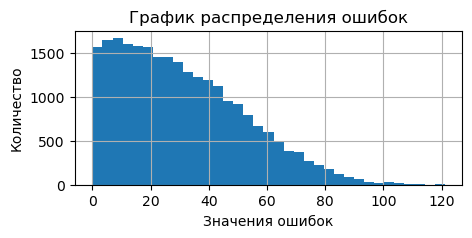

In [13]:
model_0 = LinearRegression()
model_0.fit(features_train_0, target_train_0)
predicted_valid_0 = model_0.predict(features_valid_0)
mse_0 = mean_squared_error(target_valid_0, predicted_valid_0)
r2_score_0 = r2_score(target_valid_0, predicted_valid_0)
mae_0 = mean_absolute_error(target_valid_0, predicted_valid_0)

constant_predicted_valid_0 = pd.Series(target_train_0.mean(), index=target_valid_0.index)
constant_mse_0 = mean_squared_error(target_valid_0, constant_predicted_valid_0)
constant_r2_score_0 = r2_score(target_valid_0, constant_predicted_valid_0)
constant_mae_0 = mean_absolute_error(target_valid_0, constant_predicted_valid_0)

errors_0 = abs(target_valid_0 - predicted_valid_0)
errors_0.hist(figsize=(5,2), bins=35)
plt.xlabel("Значения ошибок")
plt.ylabel("Количество")
plt.title("График распределения ошибок")

print("Linear Regression нулевого региона")
print("MAE нулевого региона =", mae_0, ', MAE константы нулевого региона =', constant_mae_0)
print("RMSE нулевого региона =", mse_0 ** 0.5, ', RMSE константы нулевого региона =', constant_mse_0 ** 0.5)
print("R2 нулевого региона =", r2_score_0, ", R2 константы нулевого региона =", constant_r2_score_0)
print("Средний запас предсказанный нулевого региона =", predicted_valid_0.mean(),
      ", Средний запас истинный нулевого региона =", target_valid_0.mean())

Судя по метрикам, модель справляется не очень хорошо. На графике видно, что значения ошибок доходят до 120 едениц. В этом случае нам лучше ориентироваться на RMSE, а он достаточно высок и справляется с задачей немного лучше чем константная модель. Это подтверждает слабый показатель R2.

**Обучение модели для первого региона.**

Linear Regression первого региона
MAE первого региона = 0.7187662442124756 , MAE константы первого региона = 40.3700265899633
RMSE первого региона = 0.8930992867756167 , RMSE константы первого региона = 46.02144533725471
R2 первого региона = 0.9996233978805127 , R2 константы первого региона = -8.709675861195976e-06
Средний запас предсказанный первого региона = 68.728546895446 , Средний запас истинный первого региона = 68.72313602437494


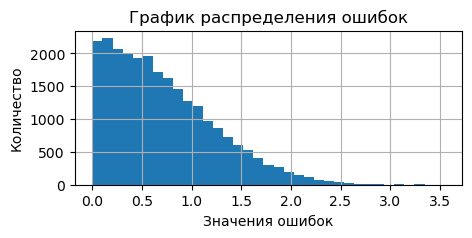

In [14]:
model_1 = LinearRegression()
model_1.fit(features_train_1, target_train_1)
predicted_valid_1 = model_1.predict(features_valid_1)
mse_1 = mean_squared_error(target_valid_1, predicted_valid_1)
r2_score_1 = r2_score(target_valid_1, predicted_valid_1)
mae_1 = mean_absolute_error(target_valid_1, predicted_valid_1)

constant_predicted_valid_1 = pd.Series(target_train_1.mean(), index=target_valid_1.index)
constant_mse_1 = mean_squared_error(target_valid_1, constant_predicted_valid_1)
constant_r2_score_1 = r2_score(target_valid_1, constant_predicted_valid_1)
constant_mae_1 = mean_absolute_error(target_valid_1, constant_predicted_valid_1)

errors_1 = abs(target_valid_1 - predicted_valid_1)
errors_1.hist(figsize=(5,2), bins=35)
plt.xlabel("Значения ошибок")
plt.ylabel("Количество")
plt.title("График распределения ошибок")

print("Linear Regression первого региона")
print("MAE первого региона =", mae_1, ', MAE константы первого региона =', constant_mae_1)
print("RMSE первого региона =", mse_1 ** 0.5, ', RMSE константы первого региона =', constant_mse_1 ** 0.5)
print("R2 первого региона =", r2_score_1, ", R2 константы первого региона =", constant_r2_score_1)
print("Средний запас предсказанный первого региона =", predicted_valid_1.mean(),
      ", Средний запас истинный первого региона =", target_valid_1.mean())

Видимо из-за интервального обозначения, как одного из признаков, так и целевого признака, модель справляется практически идеально. Все показатели на высочайшем уровне. Максимальная ошибка около 3,5 едениц, что, по сути, не существенно.

**Обучение модели для второго региона.**

Linear Regression второго региона
MAE второго региона = 32.792652105481814 , MAE константы второго региона = 37.921008293872184
RMSE второго региона = 40.02970873393434 , RMSE константы второго региона = 44.90234968510567
R2 второго региона = 0.20524758386040443 , R2 константы второго региона = -1.1817223848575864e-05
Средний запас предсказанный второго региона = 94.96504596800489 , Средний запас истинный второго региона = 94.88423280885489


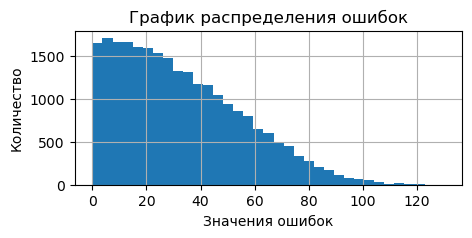

In [15]:
model_2 = LinearRegression()
model_2.fit(features_train_2, target_train_2)
predicted_valid_2 = model_2.predict(features_valid_2)
mse_2 = mean_squared_error(target_valid_2, predicted_valid_2)
r2_score_2 = r2_score(target_valid_2, predicted_valid_2)
mae_2 = mean_absolute_error(target_valid_2, predicted_valid_2)

constant_predicted_valid_2 = pd.Series(target_train_2.mean(), index=target_valid_2.index)
constant_mse_2 = mean_squared_error(target_valid_2, constant_predicted_valid_2)
constant_r2_score_2 = r2_score(target_valid_2, constant_predicted_valid_2)
constant_mae_2 = mean_absolute_error(target_valid_2, constant_predicted_valid_2)

errors_2 = abs(target_valid_2 - predicted_valid_2)
errors_2.hist(figsize=(5,2), bins=35)
plt.xlabel("Значения ошибок")
plt.ylabel("Количество")
plt.title("График распределения ошибок")

print("Linear Regression второго региона")
print("MAE второго региона =", mae_2, ', MAE константы второго региона =', constant_mae_2)
print("RMSE второго региона =", mse_2 ** 0.5, ', RMSE константы второго региона =', constant_mse_2 ** 0.5)
print("R2 второго региона =", r2_score_2, ", R2 константы второго региона =", constant_r2_score_2)
print("Средний запас предсказанный второго региона =", predicted_valid_2.mean(),
      ", Средний запас истинный второго региона =", target_valid_2.mean())

Очень скромные результаты. Показатели МАЕ и RMSE большие. R2 далек от единицы.

**Сгруппируем результаты.**

In [16]:
final_results = pd.DataFrame([[mae_0, mse_0 ** 0.5, r2_score_0, target_valid_0.mean()-predicted_valid_0.mean()],
                              [mae_1, mse_1 ** 0.5, r2_score_1, target_valid_1.mean()-predicted_valid_1.mean()],
                              [mae_2, mse_2 ** 0.5, r2_score_2, target_valid_2.mean()-predicted_valid_2.mean()]],
                             index = ['Показатели модели нулевого региона',
                                      'Показатели модели первого региона',
                                      'Показатели модели второго региона'],
                             columns=['MAE','RMSE','R2', 'Разница ср. знач. "True - Pred"'])
final_results

,MAE,RMSE,R2,"Разница ср. знач. ""True - Pred"""
Показатели модели нулевого региона,30.919601,37.579422,0.279943,-0.513971
Показатели модели первого региона,0.718766,0.893099,0.999623,-0.005411
Показатели модели второго региона,32.792652,40.029709,0.205248,-0.080813


Модель обученная на показателях первого региона явный лидер. Разница средних значений говорит о склонности всех моделей, предсказывать в большую сторону.

Такие высокие показатели модели первого региона, очень подозрительны. Возможно имеет место утечка целевого признака или целевой признак сильно коррелирует с одним из показателей. Проверим корреляцию показателей и целевого признака.

In [17]:
[features_train_1[i].corr(target_train_1) for i in ['f0','f1','f2']]

[-0.032022347067259, -0.011245842941713652, 0.9993960152042435]

Предположения подтвердились. Почти прямая зависимость от показателя `f2`.

<AxesSubplot:xlabel='f2', ylabel='product'>

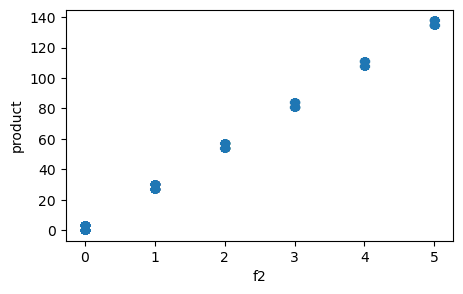

In [18]:
data_1.plot(x='f2', y='product', kind='scatter', alpha=0.05, figsize=(5,3))

Явно какая-то проблема с данными. Необходимо указать ее заказчику.

Проиндексируем и сохраним предсказания моделей.

In [19]:
i_predicted_valid_0 = pd.DataFrame(list(predicted_valid_0), index = target_valid_0.index, columns= ['product'])

i_predicted_valid_1 = pd.DataFrame(list(predicted_valid_1), index = target_valid_1.index, columns= ['product'])

i_predicted_valid_2 = pd.DataFrame(list(predicted_valid_2), index = target_valid_2.index, columns= ['product'])

## Подготовка к расчёту прибыли

У заказчика есть следующие условия:

- При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
- Бюджет на разработку скважин в регионе — 10 млрд рублей.
- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
- После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

Сохраним все ключевые значения для расчётов в отдельных переменных.

In [20]:
EXPLORED_PLACES = 500 #исследуемые точки
BEST_WELLS_TO_EXPLORED = 200 #лучшие точки
ONE_REGION_BUDGET = 10000000000
ONE_WELL_BUDGET = ONE_REGION_BUDGET/BEST_WELLS_TO_EXPLORED #бюджет на регион
ONE_PRODUCT_UNIT = 1000 #барелей в единице продукции
ONE_BARREL_PRICE = 450 #доход с барели
ONE_UNIT_PRICE = ONE_BARREL_PRICE*ONE_PRODUCT_UNIT #цена единицы продукции
LOSS_PROBABILITY = 0.025 #вероятность убытков
MIN_WELL_PRODUCT_VOLUME = round(ONE_WELL_BUDGET/ONE_UNIT_PRICE, 2)+0.01

In [21]:
print ('Минимальный объем единиц продукции с одной скважины для безубыточного разработки =', MIN_WELL_PRODUCT_VOLUME)

Минимальный объем единиц продукции с одной скважины для безубыточного разработки = 111.12


На 200 лучших скважин из 500 выдется бюджет в 10 млрд. руб. При цене 1 барреля в 450 рублей, средний объем в 200 скважинах должен быть не меньше 111.12 единиц продукции для безубыточной разработки. 

Сравним со средним объемом скважин в каждом регионе.

In [22]:
[x.mean() for x in [target_0, target_1, target_2]]

[92.49999999999974, 68.82500000002561, 95.00000000000041]

Среднее у первого региона достаточно небольшое по сравнению с остальными.

Посмотрим, какая доля и всех скважин, подходит нашим минимальным потребностям.

In [23]:
print('{:.2%}'.format(len([target_0[i] for i in  range(len(target_0)) if target_0[i] >=  MIN_WELL_PRODUCT_VOLUME])/len(target_0)))
print('{:.2%}'.format(len([target_1[i] for i in  range(len(target_1)) if target_1[i] >=  MIN_WELL_PRODUCT_VOLUME])/len(target_1)))
print('{:.2%}'.format(len([target_2[i] for i in  range(len(target_2)) if target_2[i] >=  MIN_WELL_PRODUCT_VOLUME])/len(target_2)))

36.58%
16.54%
38.17%


В нулевом и втором регионе доля скважин подходящих нашим условиям достаточно высока - 36.5% и 38%. А вот в первом регионе всего 16.5%.

Напишем формулу для расчета прибыли. Сортируем по прогнозам, берем факт.

In [24]:
def profit(targets, predictions, count):
    prediction_sorted = predictions.sort_values(ascending=False, by='product')
    selected = targets.loc[prediction_sorted.index][:count]
    return ONE_UNIT_PRICE * selected.sum()-ONE_REGION_BUDGET

## Расчёт прибыли и рисков 

Расчет прибыли будет производиться техникой *Bootstrap*:
- Кол-во повторений - 1000:
  - Из всех скважин региона выбирается 500 случайных;
  - Из предсказанных значений объема скважины выбирается 200 лучших;
  - Расчитывается потенциальная прибыль по фактическим значениям объема скважин.

In [25]:
sns.set()
%config InlineBackend.figure_format = 'svg'

### Нулевой регион

Средняя прибыль в миллионах: 425.94
95%-ый доверительный интервал в миллионах от -102.09 до 947.98
Вероятность убытков: 6.00%


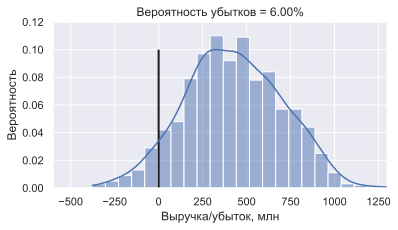

In [26]:
values_0 = []
for i in range(1000):
    target_subsample = target_valid_0.sample(n=EXPLORED_PLACES, replace=True, random_state=RANDOM_RANDOM_STATE)
    pred_subsample = i_predicted_valid_0.loc[target_subsample.index]
    values_0.append(profit(target_subsample, pred_subsample, BEST_WELLS_TO_EXPLORED))
    

values_0 = pd.Series(values_0)/1000000
distr_0 = st.norm(values_0.mean(),np.std(values_0))
res_0 = distr_0.cdf(-0.01)

risks_0 = (values_0 < 0).mean()

lower_0 = round(values_0.quantile(0.025), 2)
upper_0 = round(values_0.quantile(1-0.025), 2)

print('Средняя прибыль в миллионах:', round(values_0.mean(),2))
print("95%-ый доверительный интервал в миллионах от {} до {}".format(lower_0, upper_0))
print('Вероятность убытков:','{:.2%}'.format(risks_0))

fig, ax = plt.subplots(figsize = (6, 3))
x = np.linspace(distr_0.ppf(0.001), distr_0.ppf(0.999), 200)
ax.vlines(0, 0, 0.1, color='k', lw=2)
ax.set_title('Вероятность убытков = {:.2%}'.format(risks_0))
ax.set (xlabel='Выручка/убыток, млн', ylabel='Вероятность')
ax.set_ylim(0, 0.12)
ax.set_xlim(-600, 1300)
sns.histplot(x=values_0, stat='probability', discrete=False, kde=True);

### Первый регион

Средняя прибыль в миллионах: 518.26
95%-ый доверительный интервал в миллионах от 128.12 до 953.61
Вероятность убытков: 0.30%


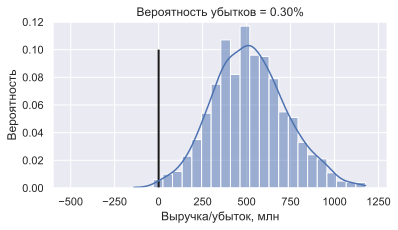

In [27]:
values_1 = []
for i in range(1000):
    target_subsample = target_valid_1.sample(n=EXPLORED_PLACES, replace=True, random_state=RANDOM_RANDOM_STATE)
    pred_subsample = i_predicted_valid_1.loc[target_subsample.index]
    values_1.append(profit(target_subsample, pred_subsample, BEST_WELLS_TO_EXPLORED))
    

values_1 = pd.Series(values_1)/1000000
distr_1 = st.norm(values_1.mean(),np.std(values_1))
res_1 = distr_1.cdf(-0.01)

risks_1 = (values_1 < 0).mean()

lower_1 = round(values_1.quantile(0.025), 2)
upper_1 = round(values_1.quantile(1-0.025), 2)

print('Средняя прибыль в миллионах:', round(values_1.mean(),2))
print("95%-ый доверительный интервал в миллионах от {} до {}".format(lower_1, upper_1))
print('Вероятность убытков:','{:.2%}'.format(risks_1))

fig, ax = plt.subplots(figsize = (6, 3))
x = np.linspace(distr_1.ppf(0.001), distr_1.ppf(0.999), 200)
ax.vlines(0, 0, 0.1, color='k', lw=2)
ax.set_title('Вероятность убытков = {:.2%}'.format(risks_1))
ax.set (xlabel='Выручка/убыток, млн', ylabel='Вероятность')
ax.set_ylim(0, 0.12)
ax.set_xlim(-600, 1300)
sns.histplot(x=values_1, stat='probability', discrete=False, kde=True);

### Второй регион

Средняя прибыль в миллионах: 420.19
95%-ый доверительный интервал миллионах: от -115.85 до 989.63
Вероятность убытков: 6.20%


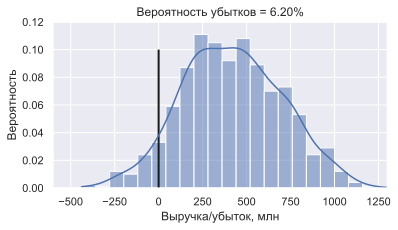

In [28]:
values_2 = []
for i in range(1000):
    target_subsample = target_valid_2.sample(n=EXPLORED_PLACES, replace=True, random_state=RANDOM_RANDOM_STATE)
    pred_subsample = i_predicted_valid_2.loc[target_subsample.index]
    values_2.append(profit(target_subsample, pred_subsample, BEST_WELLS_TO_EXPLORED))
    

values_2 = pd.Series(values_2)/1000000
distr_2 = st.norm(values_2.mean(),np.std(values_2))
res_2 = distr_2.cdf(-0.01)

risks_2 = (values_2 < 0).mean()
lower_2 = round(values_2.quantile(0.025), 2)
upper_2 = round(values_2.quantile(1-0.025), 2)

print('Средняя прибыль в миллионах:', round(values_2.mean(),2))
print("95%-ый доверительный интервал миллионах: от {} до {}".format(lower_2, upper_2))
print('Вероятность убытков:','{:.2%}'.format(risks_2))

fig, ax = plt.subplots(figsize = (6, 3))
x = np.linspace(distr_2.ppf(0.001), distr_2.ppf(0.999), 200)
ax.vlines(0, 0, 0.1, color='k', lw=2)
ax.set_title('Вероятность убытков = {:.2%}'.format(risks_2))
ax.set (xlabel='Выручка/убыток, млн', ylabel='Вероятность')
ax.set_ylim(0, 0.12)
ax.set_xlim(-600, 1300)
sns.histplot(x=values_2, stat='probability', discrete=False, kde=True);

## Вывод

У нулевого и второго региона слишком высокие риски. Однако средняя прибыль достаточно высокая. Первый регион, самый перспективный регион для разработки. 

У модели, обученной на данных первого региона, наилучшие метрики, а показатели прибыльности самые высоки, при очень низких рисках убытков.

Стоит отметить, что сама модель, справляется идеально, с оприделением целевого показателя, но в самОм первом регионе запасы в среднем меньше по сравнению с другими регионами и подходящих под безубыточную разработку скважин всего 16.5% от всего кол-ва. Т.е. если мы  для разработки из 500 скважин отбираем 200 лучших, то примерно только 80 из них будут приносить прибыль, но эта прибыль будет покрывать убытки от разработки остальных 120 скважин (или с вероятностью в 0.5-1%, что не будет).

*Проект окончен.*

***Спасибо за уделенное работе время!***